In [27]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.7.1+cpu
0.22.1+cpu


### Getting A Dataset

In [28]:
train_data = datasets.FashionMNIST(
    root="datasets",
    download=True,
    train=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="datasets",
    download=True,
    train=False,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [29]:
len(train_data),len(test_data)

(60000, 10000)

In [30]:
class_names = test_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [31]:
class_name_idx = test_data.class_to_idx
class_name_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [32]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [33]:
image.shape

torch.Size([1, 28, 28])

In [34]:
print(f"Image Shape -> {image.shape}")
print(f"Image Label -> {class_names[label]}")

Image Shape -> torch.Size([1, 28, 28])
Image Label -> Ankle boot


Image shape: torch.Size([1, 28, 28])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

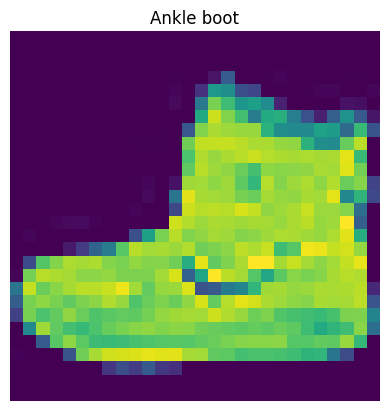

In [35]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(class_names[label])
plt.axis(False)

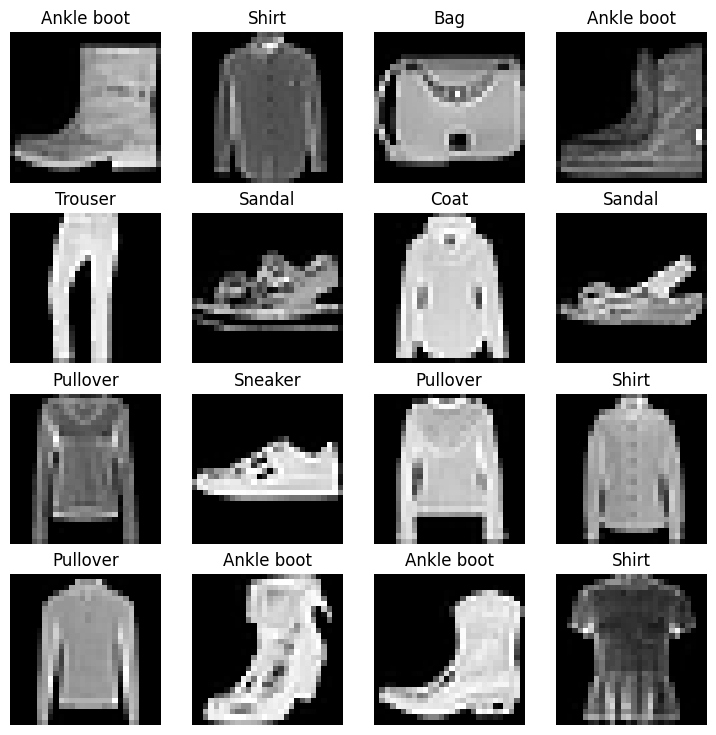

In [36]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data),size=[1]).item()
    image,label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(),cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

**Data Loader**

In [37]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

In [38]:
print(f"Dataloader: {train_dataloader}\nLength: {len(train_dataloader)} Batches of {BATCH_SIZE} ...")
print(f"Dataloader: {test_dataloader}\nLength: {len(test_dataloader)} Batches of {BATCH_SIZE} ...")

Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7fad84cd2980>
Length: 1875 Batches of 32 ...
Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7fad84c30ac0>
Length: 313 Batches of 32 ...


In [39]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Shape -> torch.Size([1, 28, 28])
Image Label -> Sneaker


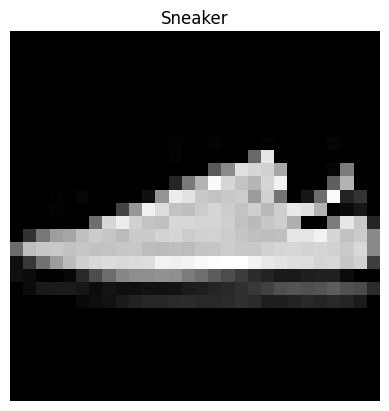

In [40]:
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
image,label = train_data[random_idx]
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image Shape -> {image.shape}")
print(f"Image Label -> {class_names[label]}")

In [41]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
print(f"Shape Before Flatten: {x.shape}")
x = flatten_model(x)
print(f"Shape After Flatten: {x.shape}")

Shape Before Flatten: torch.Size([1, 28, 28])
Shape After Flatten: torch.Size([1, 784])


In [42]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [43]:
model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to("cpu")

In [44]:
torch.manual_seed(42)
dummy_x = torch.rand([1,1,28,28])

In [45]:
model_0(dummy_x)

tensor([[ 0.2984,  0.0482, -0.1671,  0.0964,  0.0050,  0.3900,  0.2800, -0.4258,
         -0.1690, -0.2083]], grad_fn=<AddmmBackward0>)

In [46]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Helper Functions File Already Exists Skipping Download")
else:
  print("Downloading Helper Functions File")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

Helper Functions File Already Exists Skipping Download


In [47]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [48]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):
  total_time = end-start
  print(f"Train Time on {device}: {total_time:.3f} seconds")
  return total_time

In [49]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [50]:
#Import the tqdm for the progress bar
from tqdm.auto import tqdm

#Set The Seed and Start The Timer
torch.manual_seed(42)
start_time_on_cpu = timer()

# Set the number of epochs
EPOCHS = 3

# Create Training And Test Loops
for epoch in tqdm(range(EPOCHS)):
  print(f"Epoch: {epoch+1}\n-------")
  train_loss = 0
  #Adding a loop to loop through batches
  for batch,(X,y) in enumerate(train_dataloader):
    model_0.train()
    #Forward Loss
    y_pred = model_0(X)

    #Calculate The Loss
    loss = loss_fn(y_pred,y)
    train_loss += loss

    #Zero-grad the optimizer
    optimizer.zero_grad()

    #Loss Backward
    loss.backward()

    #Optimizer Step
    optimizer.step()

    #Print Out What's Happening
    if batch % 400 == 0:
      print(f"Looked At {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  #Divide tottal train loss by length train dataloader
  train_loss = train_loss/len(train_dataloader)

  ### Test Loop
  test_loss,test_acc =0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #Forward Pass
      test_pred = model_0(X_test)

      #Calculate the loss
      test_loss += loss_fn(test_pred,y_test)

      #Calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    #Divide tottal test loss by length test dataloader
    test_loss = test_loss/len(test_dataloader)

    # Calculate The test acc by batch
    test_acc = test_acc/len(test_dataloader)

  #Print What's Happening
  print(f"Train Loss: {train_loss:.2f} | Test Loss: {test_loss:.2f} | Test Acc: {test_acc:.2f}")

end_time_on_cpu = timer()
total_time_taken_on_cpu = print_train_time(start=start_time_on_cpu,
                                           end=end_time_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1
-------
Looked At 0/60000 samples
Looked At 12800/60000 samples
Looked At 25600/60000 samples
Looked At 38400/60000 samples
Looked At 51200/60000 samples


 33%|███▎      | 1/3 [00:08<00:16,  8.34s/it]

Train Loss: 0.59 | Test Loss: 0.52 | Test Acc: 81.84
Epoch: 2
-------
Looked At 0/60000 samples
Looked At 12800/60000 samples
Looked At 25600/60000 samples
Looked At 38400/60000 samples
Looked At 51200/60000 samples


 67%|██████▋   | 2/3 [00:17<00:09,  9.05s/it]

Train Loss: 0.48 | Test Loss: 0.48 | Test Acc: 83.18
Epoch: 3
-------
Looked At 0/60000 samples
Looked At 12800/60000 samples
Looked At 25600/60000 samples
Looked At 38400/60000 samples
Looked At 51200/60000 samples


100%|██████████| 3/3 [00:29<00:00,  9.71s/it]

Train Loss: 0.46 | Test Loss: 0.48 | Test Acc: 83.50
Train Time on cpu: 29.134 seconds


In [51]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:str):
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y = X.to(device),y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    #Scale the loss and accuracy for the average
    loss = loss/len(data_loader)
    acc = acc/len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}

In [52]:
model_0_results = eval_model(model=model_0,
                             device='cpu',
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

100%|██████████| 313/313 [00:01<00:00, 270.55it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4777321219444275,
 'model_acc': 83.49640575079871}

###Device Code


In [53]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

###Model With Non-Linearity

In [54]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU(),
    )
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [55]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [56]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [57]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")



In [58]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

EPOCHS = 3

for epoch in tqdm(range(EPOCHS)):
  print(f"Epoch: {epoch+1}\n-------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)
train_time_end_on_gpu = timer()
total_time_taken_on_gpu = print_train_time(start=train_time_start_on_gpu,
                 end = train_time_end_on_gpu,
                 device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1
-------
Train loss: 1.09199 | Train accuracy: 61.34%


 33%|███▎      | 1/3 [00:09<00:18,  9.25s/it]

Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 2
-------
Train loss: 0.78101 | Train accuracy: 71.93%


 67%|██████▋   | 2/3 [00:18<00:09,  9.33s/it]

Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 3
-------
Train loss: 0.67027 | Train accuracy: 75.94%


100%|██████████| 3/3 [00:27<00:00,  9.21s/it]

Test loss: 0.68500 | Test accuracy: 75.02%

Train Time on cpu: 27.631 seconds


In [59]:
model_1_results = eval_model(model=model_1,
                             device=device,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

100%|██████████| 313/313 [00:01<00:00, 286.46it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [60]:
model_0_results,model_1_results,total_time_taken_on_cpu,total_time_taken_on_gpu

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.4777321219444275,
  'model_acc': 83.49640575079871},
 {'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6850008964538574,
  'model_acc': 75.01996805111821},
 29.133608705000142,
 27.631382163999888)

###Building A Convolutional Neural Network

In [61]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classfier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,out_features=output_shape)
    )
  def forward(self,x):
    x = self.conv_block1(x)
    # print(x.shape)
    x = self.conv_block2(x)
    # print(x.shape)
    x = self.classfier(x)
    return x

In [62]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [63]:
torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print(f"Batch Images shape {images.shape}")
print(f"Single Image shape {test_image.shape}")
print(f"Test Image \n {test_image}")

Batch Images shape torch.Size([32, 3, 64, 64])
Single Image shape torch.Size([3, 64, 64])
Test Image 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [64]:
test_image.shape

torch.Size([3, 64, 64])

In [65]:
conv_input = nn.Conv2d(in_channels=3,
                    out_channels=10,
                    stride=1,
                    kernel_size=3,
                    padding=1)
conv_output = conv_input(test_image)
conv_output.shape

torch.Size([10, 64, 64])

In [66]:
print(f"Test Image Original Shape {test_image.shape}")

max_pool = nn.MaxPool2d(kernel_size =2)
test_image_through_conv = conv_input(test_image)
print(f"Test Image Through Conv2d Shape {test_image_through_conv.shape}")
test_image_through_maxpool = max_pool(test_image_through_conv)
print(f"Test Image Through MaxPool2d Shape {test_image_through_maxpool.shape}")

Test Image Original Shape torch.Size([3, 64, 64])
Test Image Through Conv2d Shape torch.Size([10, 64, 64])
Test Image Through MaxPool2d Shape torch.Size([10, 32, 32])


In [67]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [68]:
torch.manual_seed(42)
from timeit import default_timer as timer
start_time_on_conv = timer()
EPOCHS = 3
for epoch in tqdm(range(EPOCHS)):
  print(f"Epoch: {epoch+1}\n-------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
end_time_on_conv = timer()
total_time_taken_on_conv = print_train_time(start=start_time_on_conv,
                                            end=end_time_on_conv,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1
-------
Train loss: 0.59563 | Train accuracy: 78.40%


 33%|███▎      | 1/3 [00:29<00:59, 29.76s/it]

Test loss: 0.39714 | Test accuracy: 85.65%

Epoch: 2
-------
Train loss: 0.36179 | Train accuracy: 87.09%


 67%|██████▋   | 2/3 [00:58<00:29, 29.29s/it]

Test loss: 0.35345 | Test accuracy: 86.96%

Epoch: 3
-------
Train loss: 0.32441 | Train accuracy: 88.30%


100%|██████████| 3/3 [01:29<00:00, 29.92s/it]

Test loss: 0.32050 | Test accuracy: 88.40%

Train Time on cpu: 89.754 seconds


In [69]:
model_2_results = eval_model(model=model_2,
                             device=device,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_2_results

100%|██████████| 313/313 [00:02<00:00, 138.22it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3204987049102783,
 'model_acc': 88.39856230031948}

In [70]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results]
                              )
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.477732,83.496406
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.320499,88.398562


In [71]:
compare_results["Total_Training_Time"] = [total_time_taken_on_cpu,
                                          total_time_taken_on_gpu,
                                          total_time_taken_on_conv]

In [72]:
compare_results

,model_name,model_loss,model_acc,Total_Training_Time
0,FashionMNISTModelV0,0.477732,83.496406,29.133609
1,FashionMNISTModelV1,0.685001,75.019968,27.631382
2,FashionMNISTModelV2,0.320499,88.398562,89.753647


Text(0, 0.5, 'Model Name')

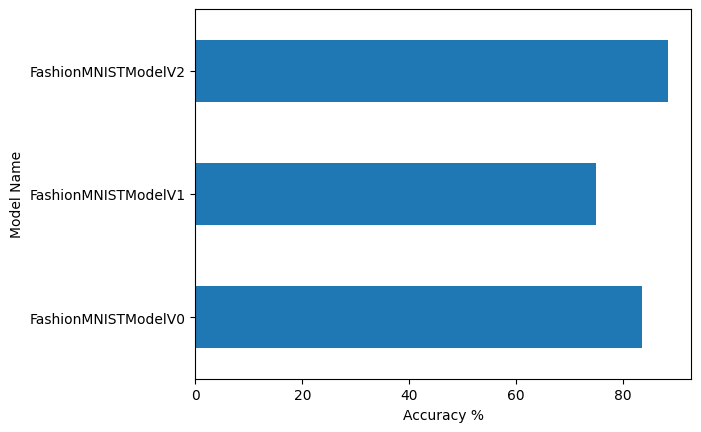

In [73]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy %")
plt.ylabel("Model Name")

In [74]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0).to(device)
      y_logits = model(sample)
      pred_prob = torch.softmax(y_logits.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [75]:
import random
# torch.manual_seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

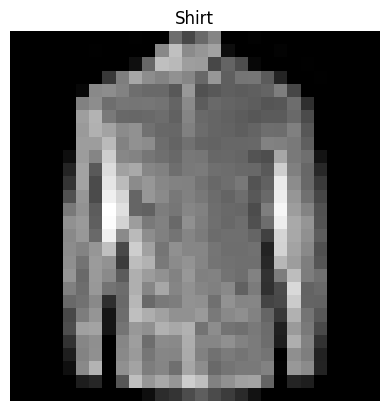

In [76]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [77]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:2]

tensor([[1.8364e-03, 1.1288e-05, 3.1370e-02, 9.3251e-05, 1.7736e-02, 1.9353e-06,
         9.4790e-01, 6.3861e-07, 1.0427e-03, 3.4863e-06],
        [4.9137e-04, 3.6032e-05, 1.1109e-03, 1.1803e-03, 1.6847e-02, 1.7589e-02,
         3.7718e-03, 3.6470e-03, 9.5512e-01, 2.0933e-04]])

In [78]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 8, 2, 2, 2, 3, 4, 4, 1])

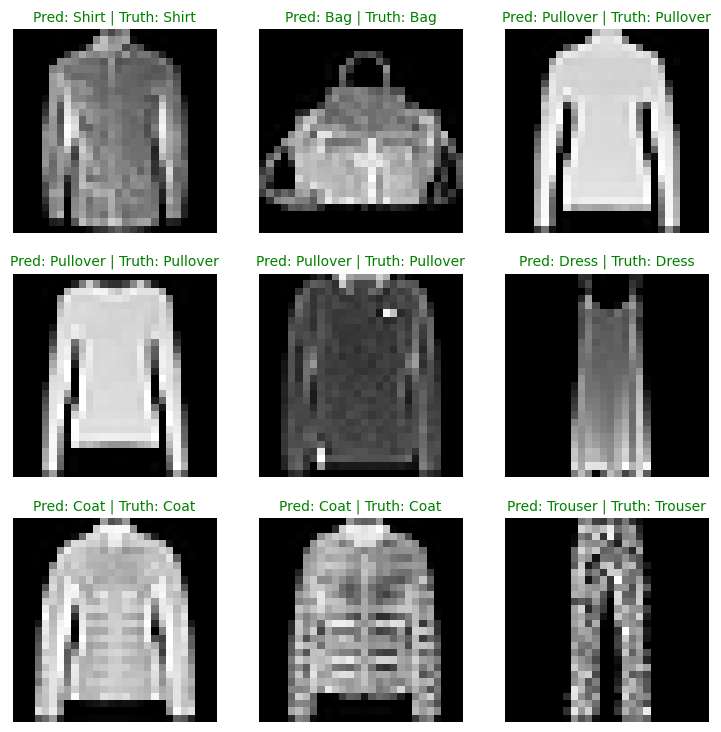

In [79]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [80]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 313/313 [00:01<00:00, 167.22it/s]


In [81]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    %pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

Note: you may need to restart the kernel to use updated packages.
mlxtend version: 0.23.4


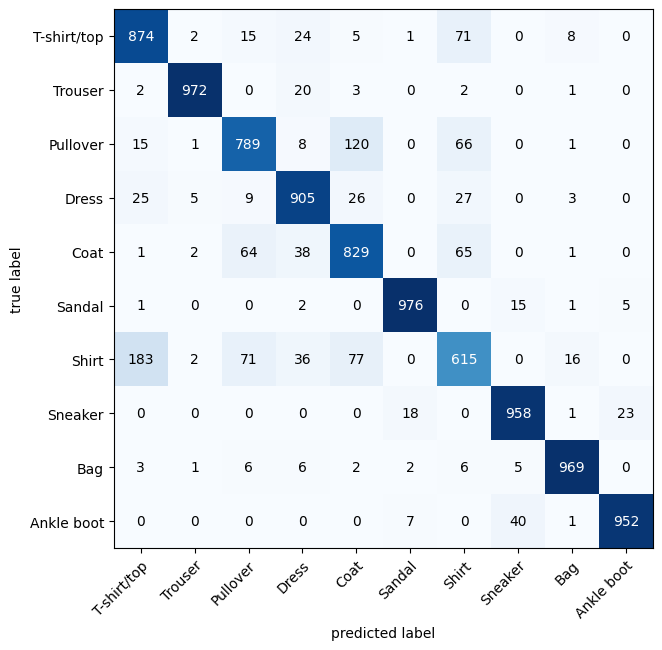

In [82]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

###Saving The Model

In [83]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
MODEL_NAME = "Convoluational_network.pth"
MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME
print(f"Saving Model in {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)

Saving Model in models/Convoluational_network.pth


In [84]:
torch.manual_seed(42)
loaded_model = FashionMNISTModelV2(input_shape=1,output_shape=len(class_names),
                                   hidden_units=10)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.to(device)

FashionMNISTModelV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classfier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [85]:
torch.manual_seed(42)
loaded_model_results = eval_model(model=loaded_model,
                                  data_loader=test_dataloader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn,
                                  device=device)

100%|██████████| 313/313 [00:02<00:00, 134.91it/s]


In [86]:
model_2_results,loaded_model_results

({'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.3204987049102783,
  'model_acc': 88.39856230031948},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.3204987049102783,
  'model_acc': 88.39856230031948})